# Лабораторная работа 3

## Кластеризация данных с использованием алгоритма K-средних
1.	Цель работы: Изучение и применение алгоритма k-средних для кластеризации данных.

2.	Основные задачи работы:

    1.	Изучение теории кластеризации и алгоритма K-средних.
    2.	Реализация алгоритма k-средних на языке Python.
    3.	Применение алгоритма k-средних на реальных данных для выявления групп схожих объектов.
    4.	Оценка и интерпретация результатов кластеризации.


# Выполнение работы

### Вариант 2
Сгенерируйте m точек в пространстве R[0,10]xR[0,10] таким образом, чтобы визуально его можно было разделить на k кластеров.
Примените алгоритм K-средних с числом кластеров K=3.
Визуализируйте результаты кластеризации, используя диаграмму рассеяния с отображением цветом кластеров.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Шаг 1. Подготовка данных

Загрузите выборку данных для кластеризации.
Произведите предобработку данных, включая масштабирование и/или нормализацию признаков.

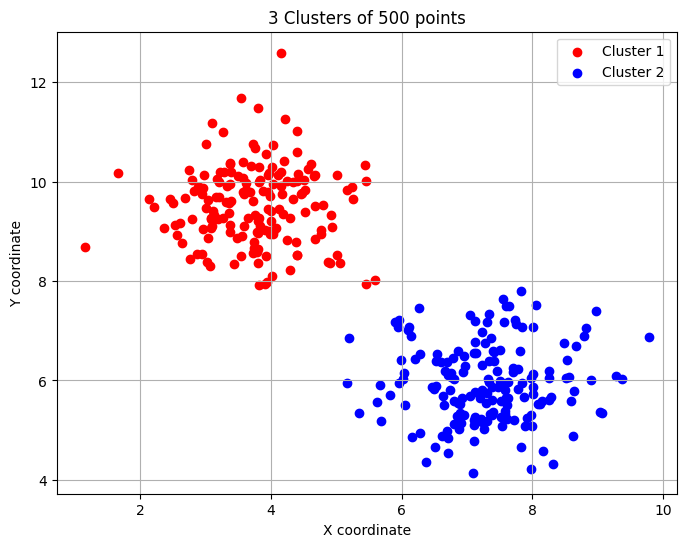

In [36]:
# Параметры
N = 500  # Общее количество точек
k_clusters = 3  # Количество кластеров
colors = ['red', 'blue', 'green', 'purple']  # Цвета для кластеров

# Генерация данных
X, y = make_blobs(n_samples=N, centers=k_clusters, cluster_std=0.8, random_state=42, center_box=(0, 10))

# Визуализация данных
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color=colors[i], label=f'Cluster {i+1}')

plt.title(f'{k_clusters} Clusters of {N} points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()

Шаг 2. Реализация алгоритма K-средних
Напишите функцию на языке Python, которая реализует алгоритм K-средних.
В функции реализуйте итеративный процесс пересчета центроидов и перераспределения объектов по кластерам.
Используйте подходящую метрику для измерения расстояния между объектами, например, Евклидово расстояние.
 

In [37]:
def euclidean_distance(a, b):
    """Вычисляет евклидово расстояние между двумя точками."""
    return np.sqrt(np.sum((a - b) ** 2))

def k_means(X, k, max_iterations=100, tol=1e-4):
    """Реализация алгоритма K-средних."""
    # Инициализация центроидов случайным образом
    np.random.seed(22)  # Для воспроизводимости
    initial_centroids_indices = np.random.choice(len(X), size=k, replace=False)
    centroids = X[initial_centroids_indices]

    for iteration in range(max_iterations):
        # 1. Присвоение кластеров
        clusters = []
        for x in X:
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            closest_centroid_index = np.argmin(distances)
            clusters.append(closest_centroid_index)

        clusters = np.array(clusters)

        # 2. Пересчет центроидов
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

        # 3. Проверка на сходимость
        if np.all(np.abs(new_centroids - centroids) < tol):
            break

        centroids = new_centroids
        
    # Вычисление инерции (суммы квадратов расстояний)
    inertia = sum(euclidean_distance(X[i], centroids[clusters[i]])**2 for i in range(len(X)))
    return centroids, clusters, inertia

Шаг 3. Применение алгоритма K-средних

Примените реализованный алгоритм K-средних на подготовленных данных.
Определите оптимальное число кластеров K, используя подходы, такие как метод локтя или индекс силуэта.
Получите результаты кластеризации, присваивая каждому объекту соответствующий кластер.


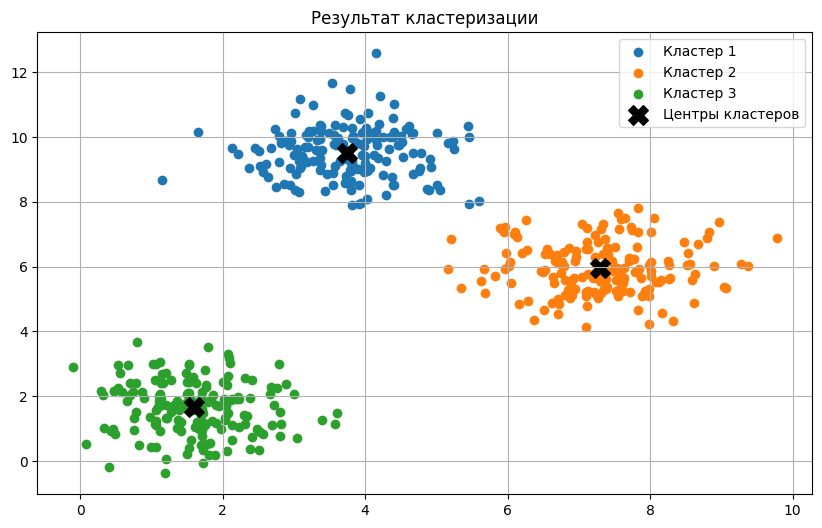

In [38]:
# Применение K-средних
centroids, clusters, _ = k_means(X, k_clusters)

# Визуализация результатов
plt.figure(figsize=(10, 6))
for i in range(k_clusters):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Кластер {i+1}')

# Отображение центров кластеров
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Центры кластеров')
plt.title('Результат кластеризации')
plt.legend()
plt.grid()
plt.show()

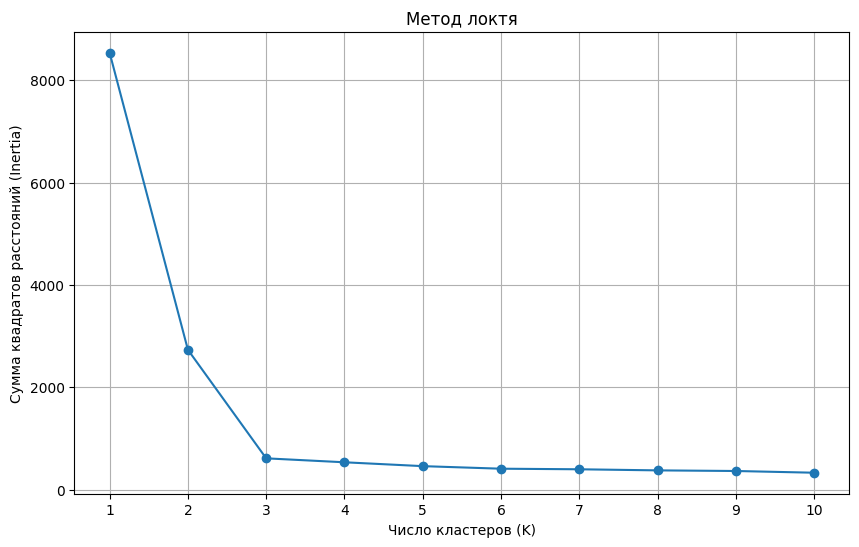

In [39]:
# Метод локтя
inertia = []
k_range = range(1, 11)

for k in k_range:
    centroids, clusters, inertia_value = k_means(X, k)
    inertia.append(inertia_value)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Число кластеров (K)')
plt.ylabel('Сумма квадратов расстояний (Inertia)')
plt.xticks(k_range)
plt.grid()
plt.show()

Шаг 4. Оценка результатов кластеризации

Визуализируйте результаты кластеризации.
Оцените качество кластеризации с использованием внутренних и внешних метрик, таких как среднее расстояние внутри кластера или коэффициент силуэта.
Проанализируйте и интерпретируйте полученные кластеры, выявив схожие характеристики или закономерности.

Среднее расстояние внутри кластеров: 0.9805
Коэффициент силуэта: 0.7506
Коэффициент силуэта: 0.7491


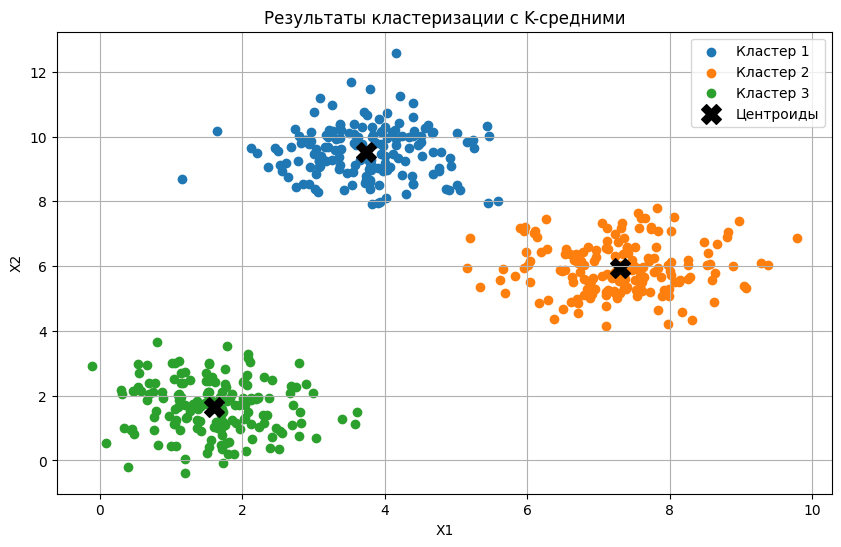

In [41]:
def average_distance_within_clusters(X, clusters, centroids):
    """Вычисляет среднее расстояние внутри кластеров."""
    total_distance = 0
    for k in range(len(centroids)):
        cluster_points = X[clusters == k]
        distances = np.array([euclidean_distance(point, centroids[k]) for point in cluster_points])
        total_distance += distances.sum()
    return total_distance / len(X)

# Применение K-средних
centroids, clusters, _ = k_means(X, k_clusters)

# Оценка качества кластеризации
avg_distance = average_distance_within_clusters(X, clusters, centroids)
sil_score = silhouette_score(X, clusters)

print(f"Среднее расстояние внутри кластеров: {avg_distance:.4f}")
print(f"Коэффициент силуэта: {sil_score:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
for k in range(len(centroids)):
    plt.scatter(X[clusters == k][:, 0], X[clusters == k][:, 1], label=f'Кластер {k+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Центроиды')
plt.title('Результаты кластеризации с K-средними')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()

### Анализ и интерпретация полученных кластеров:

1. Среднее расстояние внутри кластеров:

    Это значение показывает, насколько плотно упакованы точки внутри каждого кластера. Низкое значение указывает на высокую компактность.

2. Коэффициент силуэта:

    Значение близкое к 1 указывает на то, что кластеры хорошо отделены друг от друга и содержат схожие элементы. Значение близкое к 0 указывает на пересечение кластеров, а отрицательное значение указывает на ошибочную кластеризацию.

3. Визуализация кластеров:

    График демонстрирует распределение точек по кластерам. Центроиды показаны черной "X".